In [1]:
import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install xlrd==1.2.0

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [4]:
df = pd.read_excel('/Users/wangqilong/Documents/Programming/AIDM7410/GroupProject/Director_Actor.xlsx', engine='openpyxl', encoding = 'gb18030') 

In [5]:
df.head(20)

,Awards-winning films,Directors,Actors
0,《少年的你》,曾國祥,易烊千璽
1,NaN,NaN,周冬雨
2,NaN,NaN,尹昉
3,NaN,NaN,黃覺
4,NaN,NaN,吳越
5,NaN,NaN,周也
6,《叔．叔》,楊曜愷,太保
7,NaN,NaN,袁富華
8,NaN,NaN,盧鎮業
9,NaN,NaN,江圖


In [6]:
#Reset Index and Sum of the counts of each film
df_movies_count = df['Awards-winning films'].value_counts().reset_index()
df_movies_count.columns = ['Awards-winning films', 'number of films']
print(df_movies_count)

   Awards-winning films  number of films
0                《29+1》                1
1                  《金都》                1
2                 《香港仔》                1
3                《一代宗師》                1
4                《花椒之味》                1
..                  ...              ...
65             《一個人的武林》                1
66              《華麗上班族》                1
67               《低俗喜劇》                1
68              《湄公河行動》                1
69               《少年的你》                1

[70 rows x 2 columns]


In [7]:
#Reset Index and Sum of the counts of each director
df_directors_count = df['Directors'].value_counts().reset_index()
df_directors_count.columns = ['Directors', 'number_of_movies']
print(df_directors_count)

   Directors  number_of_movies
0         徐克                 3
1        林超賢                 3
2        彭浩翔                 3
3        葉偉信                 3
4        許鞍華                 3
5        莊文強                 3
6         陳果                 2
7        鄭保瑞                 2
8        邱禮濤                 2
9         王晶                 2
10       周顯揚                 2
11       曾國祥                 2
12       歐文傑                 2
13       梁樂民                 2
14       陳可辛                 2
15       麥兆輝                 2
16       黃修平                 2
17       杜琪峯                 2
18        黃進                 1
19       陸劍青                 1
20        成龍                 1
21       郭子健                 1
22       麥曦茵                 1
23       伍嘉良                 1
24       張嘉佳                 1
25       許誠毅                 1
26       黃綺琳                 1
27       麥浚龍                 1
28       鄒凱光                 1
29        郭臻                 1
30       曾翠珊                 1
31      

In [8]:
#Reset Index and Sum of the counts of each actor
df_actors_count = df['Actors'].value_counts().reset_index()
df_actors_count.columns = ['Actors', 'number_of_movies']
print(df_actors_count)

    Actors  number_of_movies
0      姜皓文                11
1      彭于晏                 9
2      甄子丹                 8
3      郭富城                 8
4      劉德華                 8
..     ...               ...
350     王羽                 1
351    覃恩美                 1
352     袁泉                 1
353    王千源                 1
354     黃覺                 1

[355 rows x 2 columns]


In [9]:
df_directors_count.to_csv('./df_directors_count.csv',index=False)
df_actors_count.to_csv('./df_actors_count.csv',index=False)

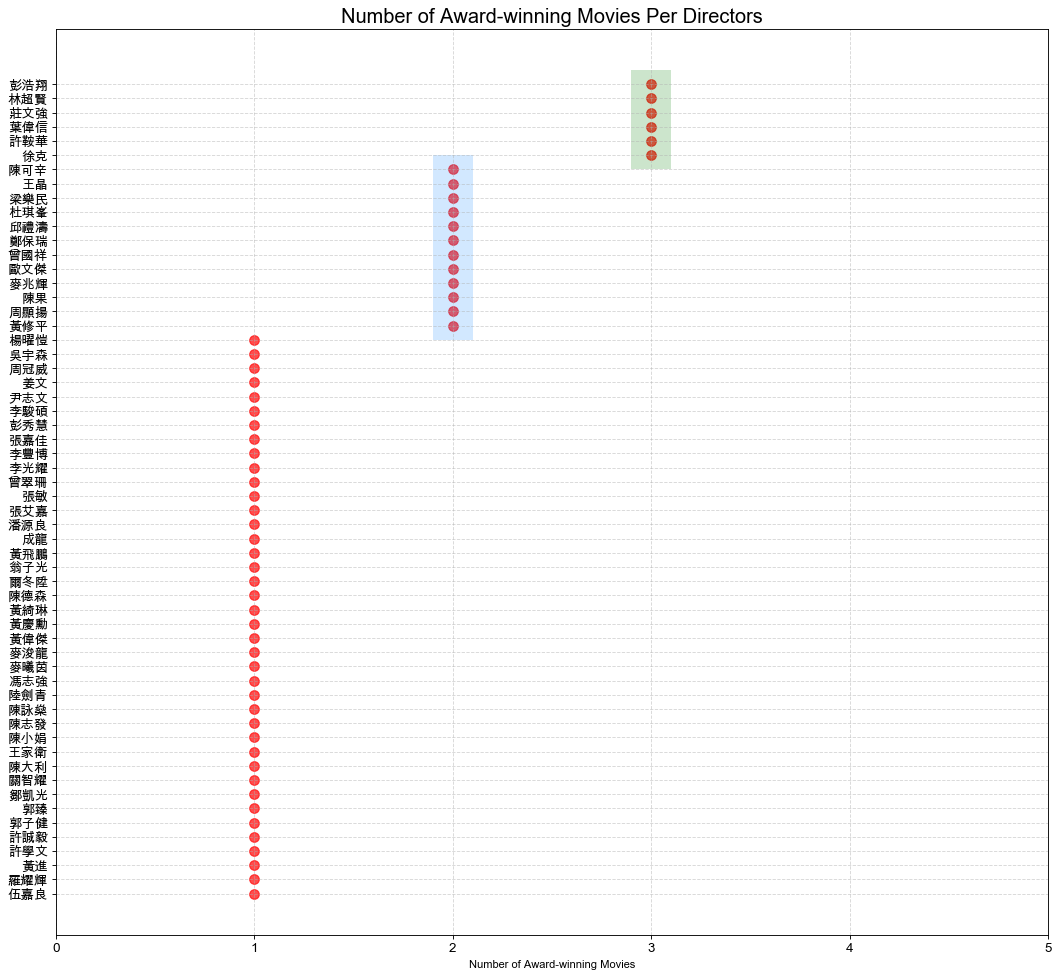

In [14]:
# Prepare Data
# Directors, number of directors
df1 = df_directors_count[['number_of_movies', 'Directors']].groupby('Directors').apply(lambda x: x.mean())
df1.sort_values('number_of_movies', inplace=True)
df1.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,15), dpi= 80)
ax.hlines(y=df1.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df1.index, x=df1.number_of_movies, s=75, color='red', alpha=0.7)

# Add Patches
import matplotlib.patches as patches
p1 = patches.Rectangle((1.9, 39), width=.2, height=13, alpha=.2, facecolor='dodgerblue')
p2 = patches.Rectangle((2.9, 51), width=.2, height=7, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Title, Label, Ticks and Ylim
ax.set_title('Number of Award-winning Movies Per Directors', fontdict={'size':18})
ax.set_xlabel('Number of Award-winning Movies')
ax.set_yticks(df1.index)
ax.set_yticklabels(df1.Directors.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 5)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [12]:
df1.head(5)

,Directors,number_of_movies
0,伍嘉良,1.0
1,羅耀輝,1.0
2,黃進,1.0
3,許學文,1.0
4,許誠毅,1.0


<BarContainer object of 355 artists>

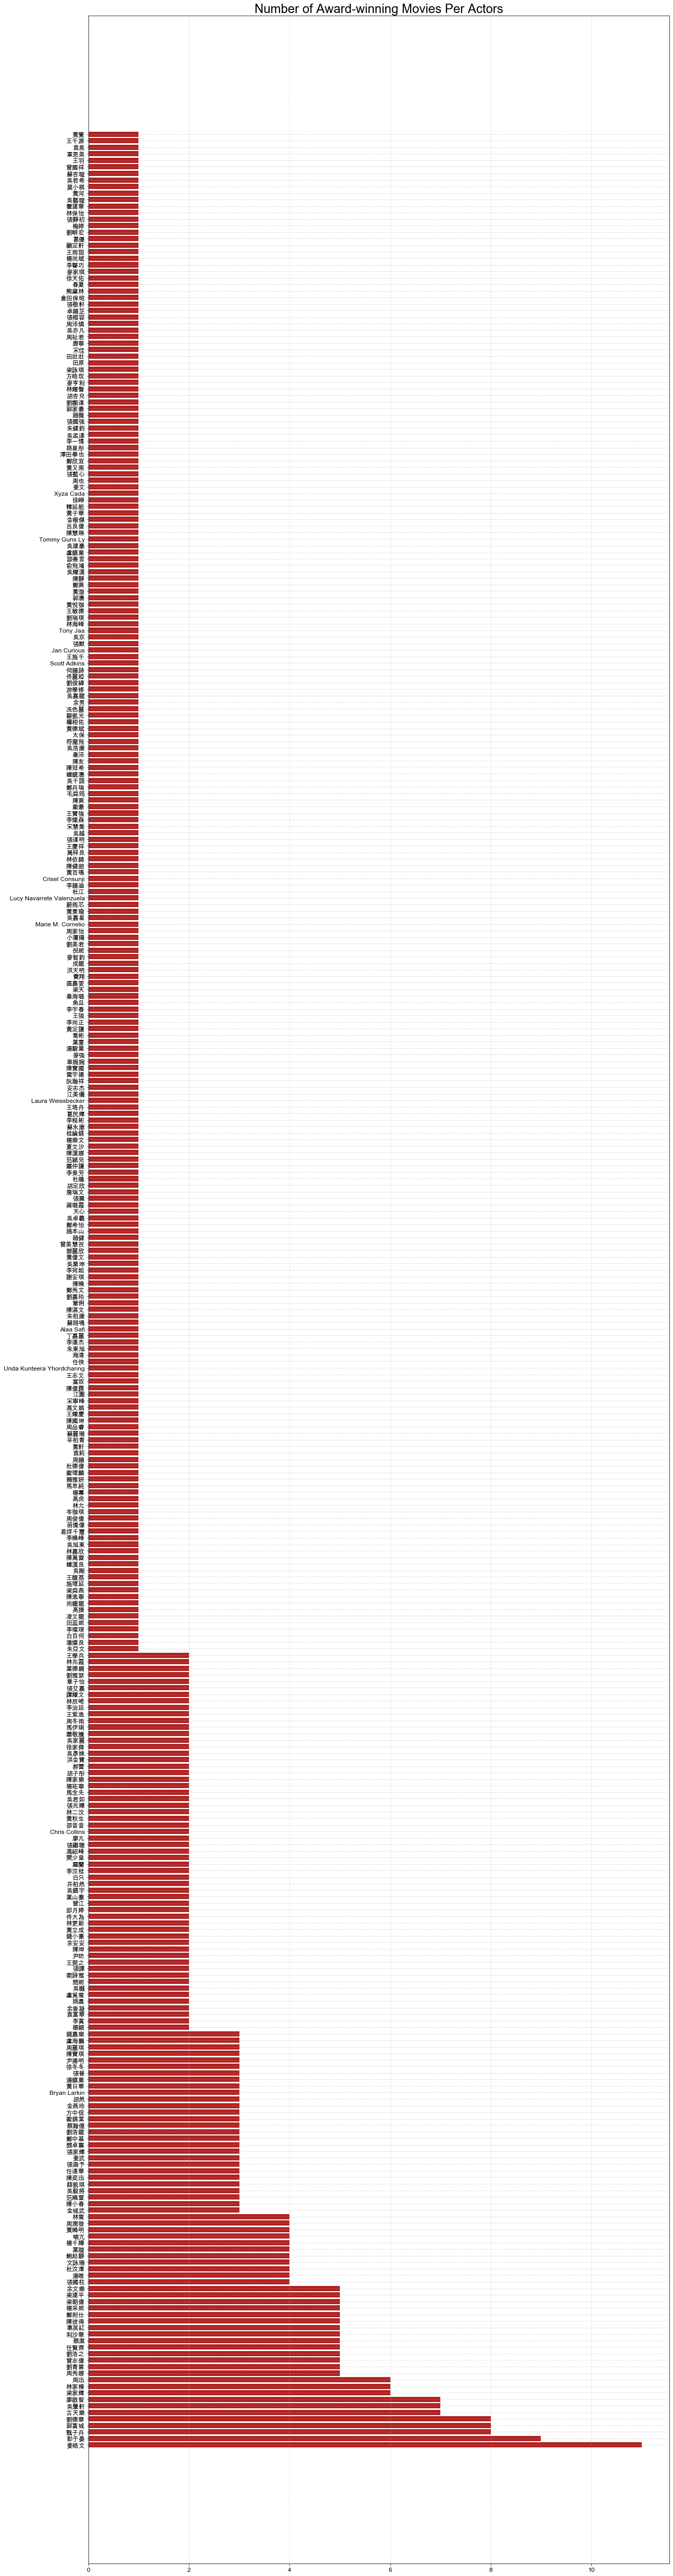

In [18]:
# Actors  number_of_actors
#df_actors_count
ax.set_title('Number of Award-winning Movies Per Actors', fontdict={'size':18})


fig = plt.figure(figsize=(20,90))  
#plt.tick_params(axis='x',labelsize=10) 
fontsize = 9
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Vertical Lines
# ax.vlines(x=1, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=3, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=5, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=7, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')

plt.title('Number of Award-winning Movies Per Actors',fontsize=24)

plt.grid(linestyle='--', alpha=0.5)
plt.barh(df_actors_count['Actors'], df_actors_count['number_of_movies'], color="firebrick")